In [1]:
import geopandas as gpd
import pandas as pd
import shapely as sl

In [2]:
!cd ..
!wget -nc https://s3-eu-west-1.amazonaws.com/pfigshare-u-files/22153815/USA_Counties_as_Shape.zip

File ‘USA_Counties_as_Shape.zip’ already there; not retrieving.



In [3]:
counties = gpd.read_file("zip://USA_Counties_as_Shape.zip")
counties['FIPS'] = counties['FIPS'].astype('int')
counties = counties.set_index('FIPS')

In [4]:
nyc=counties[(counties['STATE_NAME'] == 'New York') &
    ((counties['NAME'] == 'Bronx') | (counties['NAME'] == 'Queens') | (counties['NAME'] == 'Kings') | (counties['NAME'] == 'Richmond') | (counties['NAME'] == 'New York'))]

In [5]:
template = nyc.iloc[2].copy()

In [6]:
pop_list = ['POP2010', 'POP2012',  'WHITE', 'BLACK', 'AMERI_ES',
       'ASIAN', 'HAWN_PI', 'HISPANIC', 'OTHER', 'MULT_RACE', 'MALES',
       'FEMALES', 'AGE_UNDER5', 'AGE_5_9', 'AGE_10_14', 'AGE_15_19',
       'AGE_20_24', 'AGE_25_34', 'AGE_35_44', 'AGE_45_54', 'AGE_55_64',
       'AGE_65_74', 'AGE_75_84', 'AGE_85_UP', 'MED_AGE', 'MED_AGE_M',
       'MED_AGE_F', 'HOUSEHOLDS', 'SQMI', 'HSE_UNITS', 'VACANT', 'OWNER_OCC', 'RENTER_OCC',
       'NO_FARMS07', 'HSEHLD_1_M', 'HSEHLD_1_F',
       'MARHH_CHD', 'MARHH_NO_C', 'MHH_CHILD', 'FHH_CHILD', 'FAMILIES']
template[pop_list] = nyc[pop_list].sum()
template[pop_list]

POP2010       8.17513e+06
POP2012       8.27016e+06
WHITE         3.59734e+06
BLACK         2.08851e+06
AMERI_ES            57512
ASIAN         1.03839e+06
HAWN_PI              5147
HISPANIC      2.33608e+06
OTHER         1.06233e+06
MULT_RACE          325901
MALES         3.88254e+06
FEMALES       4.29259e+06
AGE_UNDER5         517724
AGE_5_9            473159
AGE_10_14          468154
AGE_15_19          535833
AGE_20_24          642585
AGE_25_34     1.39244e+06
AGE_35_44     1.15469e+06
AGE_45_54     1.10738e+06
AGE_55_64          890012
AGE_65_74          531461
AGE_75_84          320291
AGE_85_UP          141406
MED_AGE             179.1
MED_AGE_M           171.7
MED_AGE_F           186.3
HOUSEHOLDS    3.10978e+06
SQMI               302.06
HSE_UNITS     3.37106e+06
VACANT             261278
OWNER_OCC          962892
RENTER_OCC    2.14689e+06
NO_FARMS07             20
HSEHLD_1_M         420380
HSEHLD_1_F         575375
MARHH_CHD          529522
MARHH_NO_C         568348
MHH_CHILD   

In [7]:
template[['POP10_SQMI', 'POP12_SQMI']] = template[['POP2010', 'POP2012']] / template['SQMI']
template[['POP10_SQMI', 'POP12_SQMI']]

POP10_SQMI    27064.6
POP12_SQMI    27379.2
Name: 36061, dtype: object

In [8]:
template['AVE_HH_SZ'] = 2.64

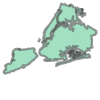

In [9]:
sh = sl.ops.unary_union(nyc.geometry)
sh

In [10]:
template.geometry = sh
template.to_frame().transpose().geometry

36061    (POLYGON ((-74.20241001323575 40.5795550410533...
Name: geometry, dtype: object

In [11]:
counties = counties.drop([36005, 36047, 36061, 36081, 36085])

In [12]:
counties = pd.concat([counties, template.to_frame().transpose()]).sort_index()

In [13]:
counties[(counties['STATE_NAME'] == 'New York') &
    ((counties['NAME'] == 'Bronx') | (counties['NAME'] == 'Queens') | (counties['NAME'] == 'Kings') | (counties['NAME'] == 'Richmond') | (counties['NAME'] == 'New York'))]

,NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,POP2010,POP10_SQMI,POP2012,POP12_SQMI,WHITE,BLACK,...,OWNER_OCC,RENTER_OCC,NO_FARMS07,AVG_SIZE07,CROP_ACR07,AVG_SALE07,SQMI,Shape_Leng,Shape_Area,geometry
36061,New York,New York,36,061,8.17513e+06,27064.6,8.27016e+06,27379.2,3.59734e+06,2.08851e+06,...,962892,2.14689e+06,20,0,0,0,302.06,0.993222,0.00629582,"MULTIPOLYGON (((-74.20241 40.57956, -74.20237 ..."


## Merge Kansas City, Missouri
Run the following code block and go back all the way to apply nyc cleaning again. 

In [14]:
kcmo=counties[(counties['STATE_NAME'] == 'Missouri') & ((counties['NAME'] == 'Jackson') | (counties['NAME'] == 'Clay') | (counties['NAME'] == 'Platte') | (counties['NAME'] == 'Cass'))]
kcmo.index.values

array([29037, 29047, 29095, 29165])

In [15]:
template = kcmo.iloc[2].copy()
pop_list = ['POP2010', 'POP2012',  'WHITE', 'BLACK', 'AMERI_ES',
       'ASIAN', 'HAWN_PI', 'HISPANIC', 'OTHER', 'MULT_RACE', 'MALES',
       'FEMALES', 'AGE_UNDER5', 'AGE_5_9', 'AGE_10_14', 'AGE_15_19',
       'AGE_20_24', 'AGE_25_34', 'AGE_35_44', 'AGE_45_54', 'AGE_55_64',
       'AGE_65_74', 'AGE_75_84', 'AGE_85_UP', 'MED_AGE', 'MED_AGE_M',
       'MED_AGE_F', 'HOUSEHOLDS', 'SQMI', 'HSE_UNITS', 'VACANT', 'OWNER_OCC', 'RENTER_OCC',
       'NO_FARMS07', 'HSEHLD_1_M', 'HSEHLD_1_F',
       'MARHH_CHD', 'MARHH_NO_C', 'MHH_CHILD', 'FHH_CHILD', 'FAMILIES']
template[pop_list] = kcmo[pop_list].sum()
template[['POP10_SQMI', 'POP12_SQMI']] = template[['POP2010', 'POP2012']] / template['SQMI']
template['NAME'] = 'Kansas City'
sh = sl.ops.unary_union(kcmo.geometry)
template.geometry = sh

In [16]:
counties = counties.drop(kcmo.index.values)

In [17]:
counties = pd.concat([counties, template.to_frame().transpose()]).sort_index()

In [18]:
!mkdir counties_shp_correct_for_nyc

mkdir: counties_shp_correct_for_nyc: File exists


In [19]:
counties.to_file('counties_shp_correct_for_nyc/counties.shp')